<center>

<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/d/d9/Logo_Télécom_ParisTech.svg/1200px-Logo_Télécom_ParisTech.svg.png" width=150px/>

</center>

<h1><center><strong><font color="chillipepper">IA705 - Apprentissage pour la robotique</font></strong></center></h1>
<h2><center><font color="blue"><strong> Projet Robotique : "Poppy Torso" </strong></font></center></h2>

<br/>

<center>
<h4> Subject of Mrs Sao Mai NGUYEN &  Mr Damien BOUCHABOU </h4> 
</center>

<br/>

<center>
<h3> <b> Done by: Yannick LETORT, Ahmed BELAAJ & Nour BEN REJEB </b> </h3> 
</center>

<br/>

In [1]:
# Imports and installs of all necessary packages for our project
import time
import gym
import numpy as np
from gym import spaces
from tqdm import tqdm

import numpy as np
from utils.skeleton import *
from utils.quaternion import *
from utils.blazepose import blazepose_skeletons
import os
from pypot.creatures import PoppyTorso
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
#from pypot.creatures.ik import IKChain
from pypot.primitive.move import Move
from pypot.primitive.move import MovePlayer

import sys
sys.path.append('./gym-examples')
import gym_examples
from gym.wrappers import FlattenObservation

from stable_baselines3 import SAC

In [2]:
# Environment initialization
env = gym.make('gym_examples/Poppy-v0') 

c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\ikpy\chain.py:60: UserWarning: Link last_joint (index: 8) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))


len idx : 12, len skeletons: 279, idx [  0  25  50  75 100 125 150 175 200 225 250 275]]


In [3]:
# Environment reset
env.reset()

c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


array([ 0.3592063 ,  0.02521932,  0.01017016, -0.10249999, -0.23478976,
        0.01377035], dtype=float32)

## SAC Model Setup and Training Overview 🤖💻

This section of our code explains the setup and execution of the Soft Actor-Critic (SAC) model for reinforcement learning in our environment. The SAC is particularly suited for tasks with continuous action spaces. Below are the key components and configurations of the SAC setup:

- **Model Initialization**:
  - **Algorithm**: Soft Actor-Critic (SAC), a modern algorithm known for its efficiency and performance in continuous action spaces.
  - **Policy**: `MlpPolicy` (Multilayer Perceptron), which utilizes neural networks to approximate both the policy and the value functions.
  - **Environment**: `env`, our custom simulation environment designed to challenge and train the agent.
  - **Verbose**: Set to `1` for detailed logging during training, which aids in monitoring the model's learning progress.

```python
model = SAC('MlpPolicy', env, verbose=1, batch_size=57)


In [4]:
# Model initialization of SAC
model = SAC('MlpPolicy', env, verbose=1, batch_size=57) 
model.learn(total_timesteps=57*15) # 57*15 = 855 steps = 15 seconds of simulation
model.save("sac_imitation")

c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
c:\Users\Moez\anaconda3\envs\Robotics\lib\site-packages\gym\utils\passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19       |
|    ep_rew_mean     | 1.9      |
| time/              |          |
|    episodes        | 4        |
|    fps             | 2        |
|    time_elapsed    | 28       |
|    total_timesteps | 76       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19       |
|    ep_rew_mean     | 1.99     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 2        |
|    time_elapsed    | 59       |
|    total_timesteps | 152      |
| train/             |          |
|    actor_loss      | -2.83    |
|    critic_loss     | 0.159    |
|    ent_coef        | 0.985    |
|    ent_coef_loss   | -0.0502  |
|    learning_rate   | 0.0003   |
|    n_updates       | 51       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_me

## Testing and Visualizing the SAC Model's Arm Movement Predictions At each step 📉 📈

This section of our notebook demonstrates the practical application and evaluation of our trained Soft Actor-Critic (SAC) model. 

In [5]:
env.reset()

array([ 0.3603272 ,  0.00805807,  0.01543447, -0.28041798, -0.00626049,
       -0.05990087], dtype=float32)

len targets 19
targets tensor([[[ 0.1621, -0.1060,  0.0577],
         [-0.1370, -0.1758,  0.0844]],

        [[ 0.1600, -0.0931,  0.0895],
         [-0.1387, -0.1679,  0.0765]],

        [[ 0.1610, -0.0669,  0.1142],
         [-0.1402, -0.1584,  0.0691]],

        [[ 0.1666, -0.0524,  0.1175],
         [-0.1408, -0.1565,  0.0674]],

        [[ 0.1658, -0.0469,  0.1151],
         [-0.1410, -0.1547,  0.0668]],

        [[ 0.1714, -0.0325,  0.1184],
         [-0.1416, -0.1528,  0.0650]],

        [[ 0.1707, -0.0270,  0.1160],
         [-0.1418, -0.1509,  0.0645]],

        [[ 0.1763, -0.0125,  0.1193],
         [-0.1424, -0.1491,  0.0627]],

        [[ 0.1755, -0.0070,  0.1169],
         [-0.1426, -0.1472,  0.0621]],

        [[ 0.1814,  0.0050,  0.1238],
         [-0.1287, -0.1555,  0.0462]],

        [[ 0.1829, -0.0010,  0.1294],
         [-0.1311, -0.1519,  0.0171]],

        [[ 0.1905,  0.0016,  0.1405],
         [-0.1329, -0.1471, -0.0114]],

        [[ 0.1901,  0.0053,  0.1398],
   

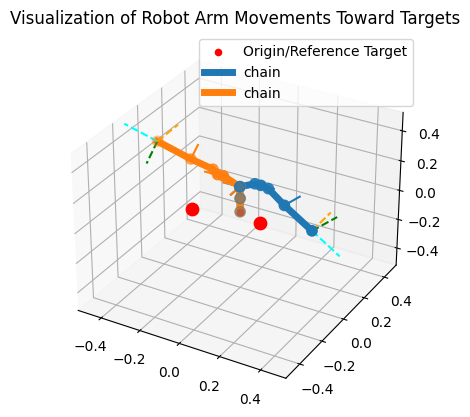

t0 tensor([ 0.1600, -0.0931,  0.0895]) and t1 tensor([-0.1387, -0.1679,  0.0765])


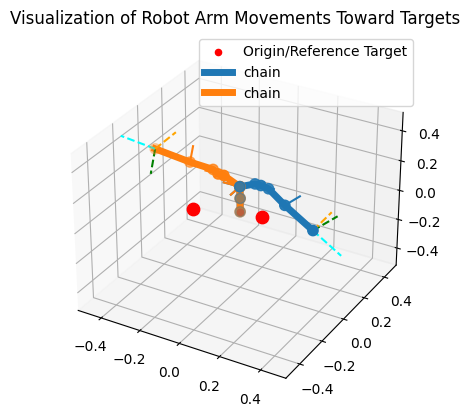

t0 tensor([ 0.1610, -0.0669,  0.1142]) and t1 tensor([-0.1402, -0.1584,  0.0691])


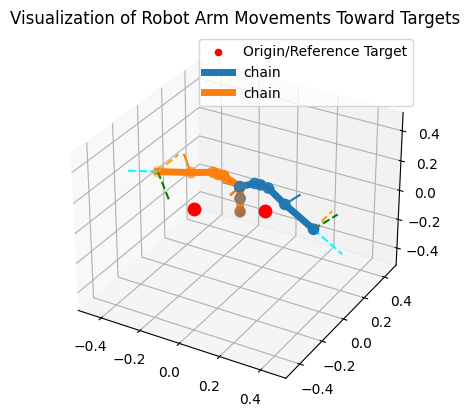

t0 tensor([ 0.1666, -0.0524,  0.1175]) and t1 tensor([-0.1408, -0.1565,  0.0674])


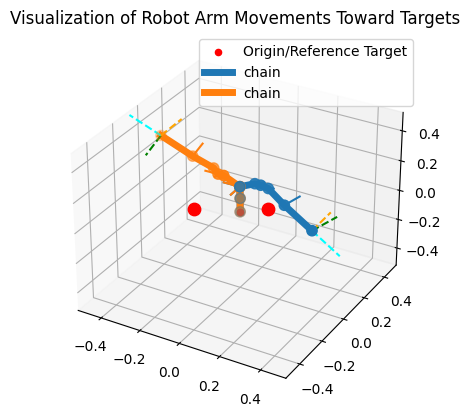

t0 tensor([ 0.1658, -0.0469,  0.1151]) and t1 tensor([-0.1410, -0.1547,  0.0668])


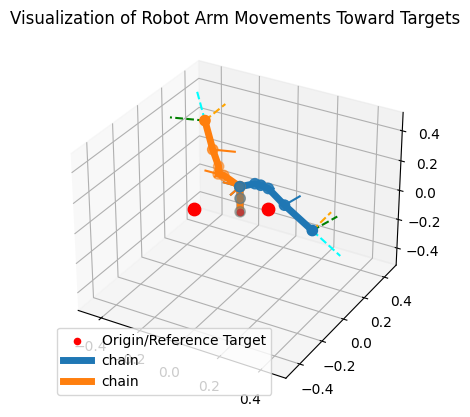

t0 tensor([ 0.1714, -0.0325,  0.1184]) and t1 tensor([-0.1416, -0.1528,  0.0650])


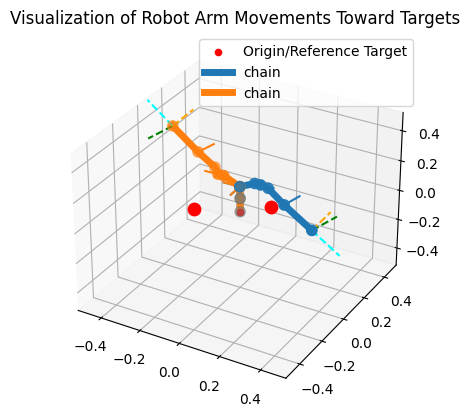

t0 tensor([ 0.1707, -0.0270,  0.1160]) and t1 tensor([-0.1418, -0.1509,  0.0645])


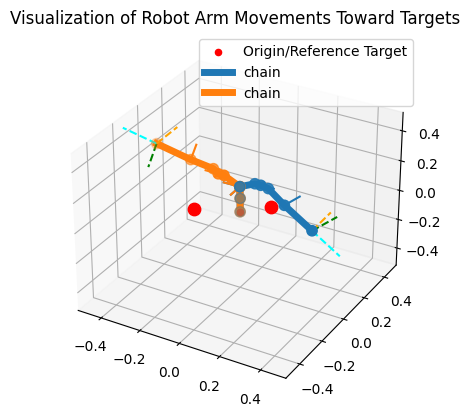

t0 tensor([ 0.1763, -0.0125,  0.1193]) and t1 tensor([-0.1424, -0.1491,  0.0627])


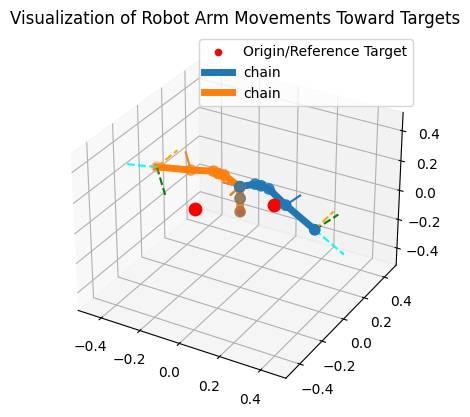

t0 tensor([ 0.1755, -0.0070,  0.1169]) and t1 tensor([-0.1426, -0.1472,  0.0621])


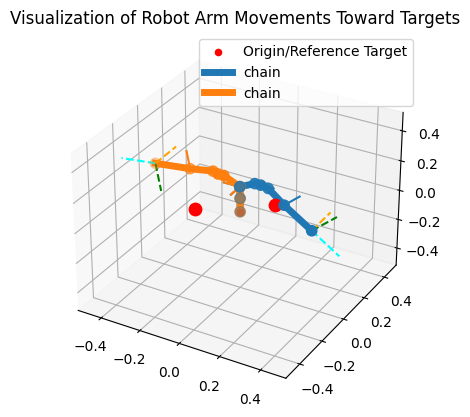

t0 tensor([0.1814, 0.0050, 0.1238]) and t1 tensor([-0.1287, -0.1555,  0.0462])


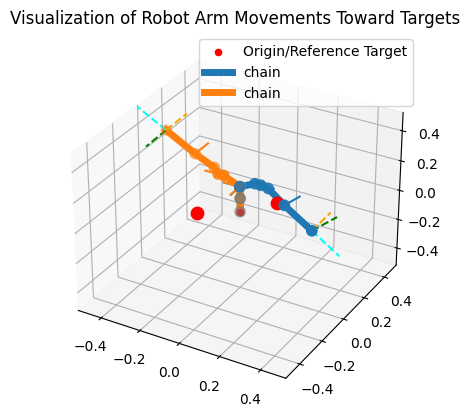

t0 tensor([ 0.1829, -0.0010,  0.1294]) and t1 tensor([-0.1311, -0.1519,  0.0171])


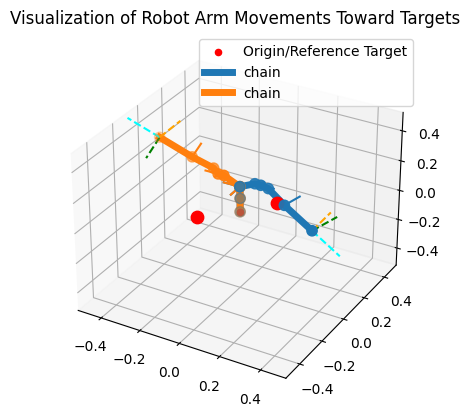

t0 tensor([0.1905, 0.0016, 0.1405]) and t1 tensor([-0.1329, -0.1471, -0.0114])


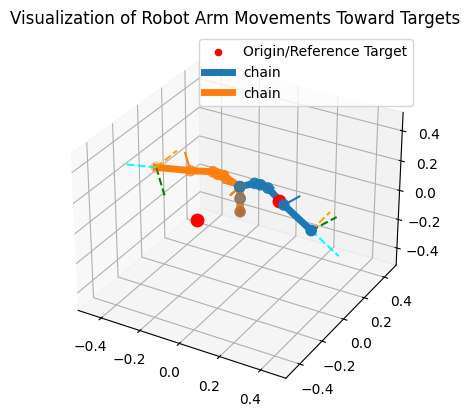

t0 tensor([0.1901, 0.0053, 0.1398]) and t1 tensor([-0.1246, -0.1517, -0.0160])


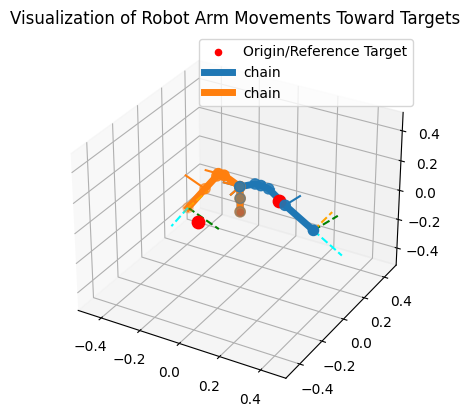

t0 tensor([0.1968, 0.0135, 0.1457]) and t1 tensor([-0.1246, -0.1527, -0.0165])


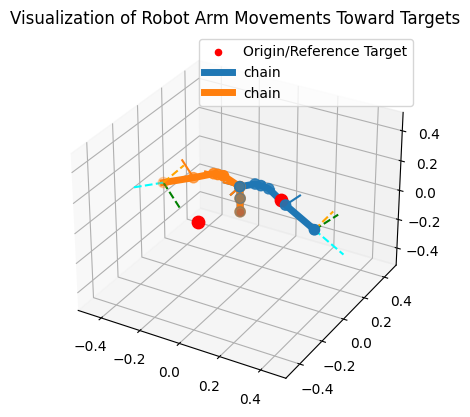

t0 tensor([ 0.1886, -0.0037,  0.1307]) and t1 tensor([-0.1244, -0.1544, -0.0120])


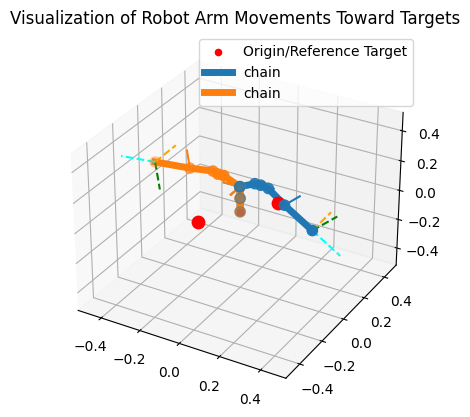

t0 tensor([ 0.1953, -0.0031,  0.1030]) and t1 tensor([-0.1233, -0.1602, -0.0064])


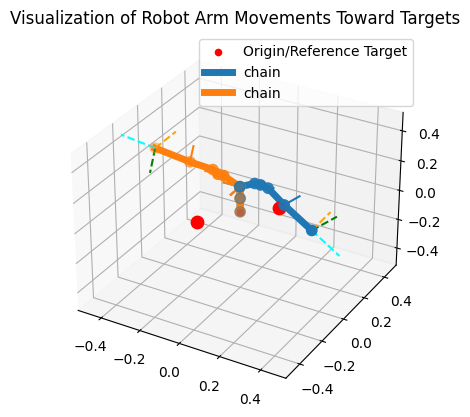

t0 tensor([ 0.1967, -0.0105,  0.0688]) and t1 tensor([-0.1218, -0.1661,  0.0009])


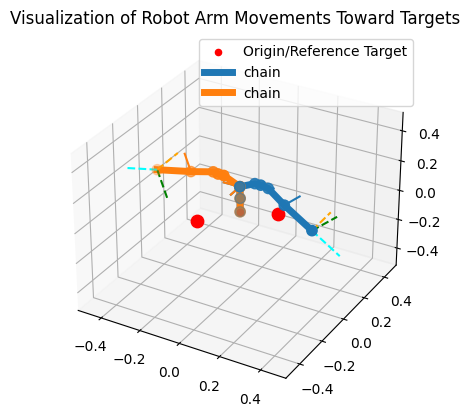

t0 tensor([ 0.2012, -0.0222,  0.0473]) and t1 tensor([-0.1209, -0.1739,  0.0065])


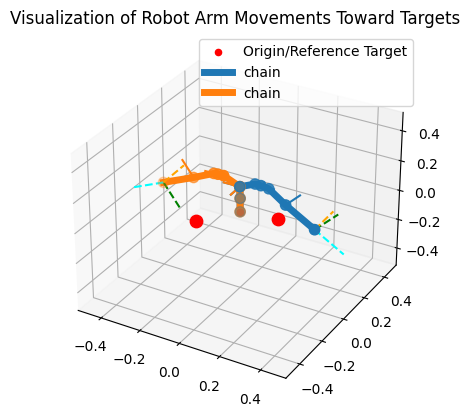

t0 tensor([ 0.1949, -0.0313,  0.0417]) and t1 tensor([-0.1205, -0.1738,  0.0077])


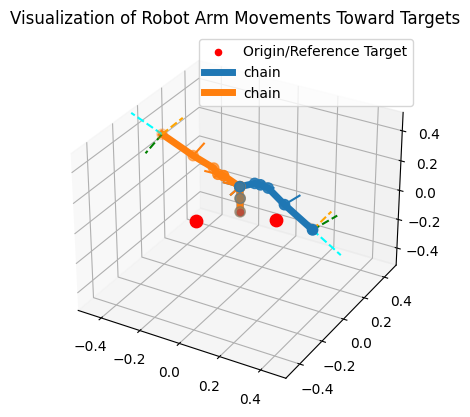

In [7]:
# Load the model
model = SAC.load("sac_imitation")

print(f"len targets {len(env.targets)}")
print(f"targets {env.targets}")

# Loop through the targets and predict the action
for t in env.targets:
    action, _states = model.predict(np.array(t.flatten()).reshape(1,-1))
    obs, rewards, dones, info = env.step(action.flatten())

    # display the arms and target
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # set the axes limits
    ax.set_xlim([-0.5, 0.5])
    ax.set_ylim([-0.5, 0.5])
    ax.set_zlim([-0.5, 0.5])

    # plot the target 
    ax.scatter([0], [0],[0])
    print(f"t0 {t[0]} and t1 {t[1]}")
    
    # Add a title to the plot
    plt.title("Visualization of Robot Arm Movements Toward Targets")

    # Plotting arms and targets with labels for the legend
    ax.scatter([0], [0], [0], color='red', label='Origin/Reference Target')
    env.poppy.l_arm_chain.plot(env.poppy.l_arm_chain.convert_to_ik_angles(env.poppy.l_arm_chain.joints_position), ax, target=tuple(t[0].numpy()))
    env.poppy.r_arm_chain.plot(env.poppy.r_arm_chain.convert_to_ik_angles(env.poppy.r_arm_chain.joints_position), ax, target=tuple(t[1].numpy()))

    # Add legend to the plot
    ax.legend()

    plt.show()  # Blocking call
    time.sleep(3)

In [ ]:
model = SAC.load("sac_imitation")

obs = env.reset()
k =0
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    k  += 5
    
    if k >= 286 :
        break
        obs = env.reset()
        k = 0